<a href="https://colab.research.google.com/github/JeanAlmeida1/DEX-day8/blob/main/Clusteriza%C3%A7%C3%A3o_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: https://www.kaggle.com/imakash3011/customer-personality-analysis

Objetivo da prática: agrupar clientes semelhantes para campanha de marketing

## Carregamento de bibliotecas e inspeção inicial

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [7]:
df.shape

(2240, 29)

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
#Observando dados nulos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
# Olhar as linhas com dados nulos
df[df.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [11]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Para preencher os 'Income' nulos, eu posso observar a média baseado em algum critério; isso melhorará a performance do modelo. Posso usar até clusters pra pegar a renda média dos clusters e preencher os nulos por essa média. 

## EDA e preparação dos dados

In [13]:
# Vou preencher os dados faltantes de Income pela média 
df['Income'] = df['Income'].fillna(np.mean(df['Income']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


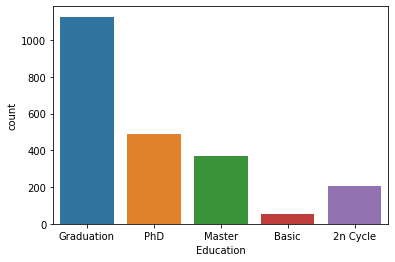

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


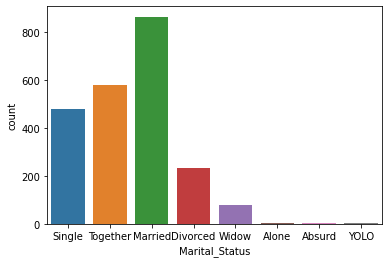

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


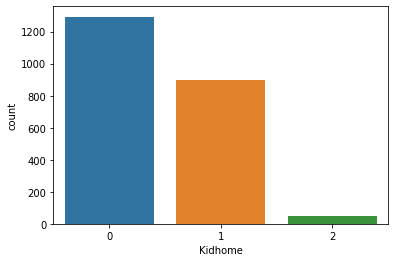

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


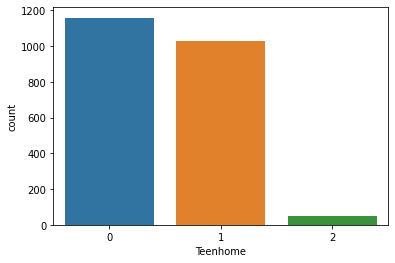

In [14]:
#Olhar distribuição das variáveis categóricas
categorical = ["Education", "Marital_Status", "Kidhome", "Teenhome"]
for cat in categorical:
  sns.countplot(df[cat])
  plt.show()

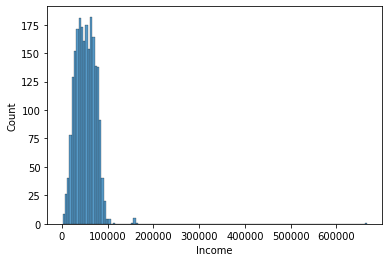

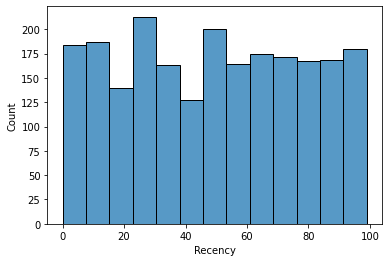

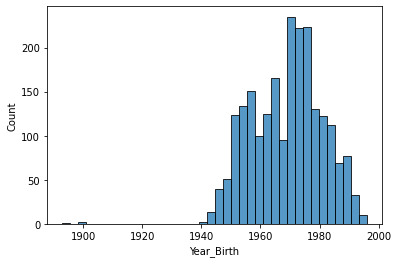

In [15]:
#Histograma de algumas variáveis numéricas
numerical_to_plot = ['Income', 'Recency', 'Year_Birth']
for cat in numerical_to_plot:
  sns.histplot(df[cat])
  plt.show()

In [16]:
# Realizando one hot encoding
to_encode = ['Education', 'Marital_Status']
for cat in to_encode:
  df[pd.get_dummies(df[cat]).columns] = pd.get_dummies(df[cat])

In [17]:
# Dropando as colunas Education e Marital_Status, que já foram trabalhadas
df = df.drop(columns=to_encode) 

In [18]:
# Dropando outras colunas
print(df.columns)

df = df.drop(columns=['ID', 'Dt_Customer'])

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', '2n Cycle',
       'Basic', 'Graduation', 'Master', 'PhD', 'Absurd', 'Alone', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'YOLO'],
      dtype='object')


In [19]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0


In [20]:
#Normalização

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Clusterização

In [21]:
from sklearn.cluster import KMeans

In [29]:
# Definindo a quantidade de clusters com Elbow's Curve 

ks = range(2, 30)
all_inertia = []

for k in ks:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_scaled)
  all_inertia.append(kmeans.inertia_)


(array([30000., 35000., 40000., 45000., 50000., 55000., 60000., 65000.,
        70000., 75000.]), <a list of 10 Text major ticklabel objects>)

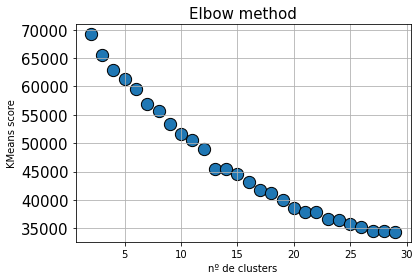

In [30]:
# Plotando a curva de Elbow 

plt.figure()
plt.scatter(x=ks, y=all_inertia, s=150, edgecolor='k')
plt.grid(True)
plt.title('Elbow method', fontsize=15)
plt.xlabel('nº de clusters')
plt.ylabel('KMeans score')
plt.yticks(fontsize=15)

In [24]:
# Usando KMeans

clt_kmean = KMeans(n_clusters=8)
clt_kmean.fit(df_scaled)
labels = clt_kmean.predict(df_scaled)

In [25]:
labels

array([0, 2, 4, ..., 1, 4, 2], dtype=int32)

In [26]:
# Usando MeanShift

In [27]:
from sklearn.cluster import MeanShift

In [28]:
clt_ms = MeanShift()
clt_ms.fit(df_scaled)
labels_ms = clt_ms.predict(df_scaled)

In [34]:
print('quantidade de clusters KMeans:', labels.max())
print()
print('quantidade de clusters MeanShift:', labels_ms.max())


quantidade de clusters KMeans: 7

quantidade de clusters MeanShift: 21


In [35]:
# Adicionando os clusters no DF

df['cluster_ms'] = labels_ms
df['cluster_kmeans'] = labels

In [36]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,cluster_ms,cluster_kmeans
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,1,0,0,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,1,0,0,0,0,2
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,1,0,0,0,4
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,1,0,0,0,7
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1,0,0,0,0,0,4
